## Overview

Ammunition manufactures provide a wealth of data for their cartridges. These data allow shooters to determine how 'flat' the trajectory of the rounds are and make adjustments for the drop and slow down of bullets at long range.

In this assignment we will use manufacturer's data and see how well we can match observations to the output of a computational model. Scientists have been creating so-called *ballistics models* since the turn of the last century. Such models allow for:

* the anticipation of the long range trajectory of projectiles, 
* answering 'what if' questions like what would be the the result of a lower drag bullet vs. a cartridge with more powder (hence, higher initial velocity), and 
* provide sophisticated interpolation between observations. 

In this class we will implement a pair of famous models for ballistics - the G1 and G7 models. Results of these models will be compared to data on bullet trajectories that manufactures provide. 

Such an assignment has some interesting aspects for both code development and modeling. Conceptually, the exercise is just like figuring out the best angle to throw a football, how fast to toss a bean bag in corn hole, or determine where a re-entry vehicle from the space station will touch down. The objectives of the lesson are to:

* gain an understanding of two dimensional motion, the ODEs that arise, and how they are solved.
* create modules for both data storage/retrieval and dynamical modeling.
* do a simple optimization.
* relate results in graphical and simple tabular forms.

### Two dimensional motion and solving ODEs

Until today, the ODEs we solved had only one dimension. For success with a projectile, we will need two dimensions. $x$ will be used to represent the range of the projectile - how far it travel over a flat Earth. The $y$ axis will represent the vertical drop in the projectile as it moves down range. 

Let us suppose that we now have some vector drag force, $\mathbf{F_d}$. Now, the equations of motion would be

$$\mathbf{F} = m \mathbf{a} = m\mathbf{g} + \mathbf{F_d}$$

where we note that all quantities in **boldface** are vectors. That means that it's possible to write equations for $x$ and $y$ separately. This more explicit form is closer to implementation in Python and those equations are

$$ a_x = ~~ \mathbf{F_d}/m  \cdot \mathbf{\hat x}$$
$$ a_y = -g + \mathbf{F_d}/m  \cdot \mathbf{\hat y}$$

Where $\mathbf{\hat x}$ is the unit vector in the $x$ direction and likewise for $\mathbf{\hat y}$. The mass has been divided through the equations. These equations indicate that the drag force must be projected onto each of the two cardinal axes, that's what the $\cdot$ or dot product accomplishes. We will return to this later. 

Lets conclude with a clear statement about what we require of the ODE solver. The $\mathbf{y_o}$ will be the initial state and consist of $(x^o,y^o,v^o_x,v^o_y)$; the 2 initial positions and 2 initial velocities. The function you write to pass to the ODE solver will return $(v_x^1,v_y^1,a_x^1,a_y^1)$; the 2 velocities and the 2 accelerations at time $t_1$, then given $t_1$, $t_2$ will be returned and so on.

### In-class
Write the ODE function that does specifies the above drag equations in 2D. Assume that an object, instead of a parameter is passed to the function. I will call that object `b`. This object includes a function `get_drag` that will accept a value $|\mathbf{v}|$ and return the magnitude of the drag force. Also assume $g$, the gravitational acceleration is  through `b.g`.

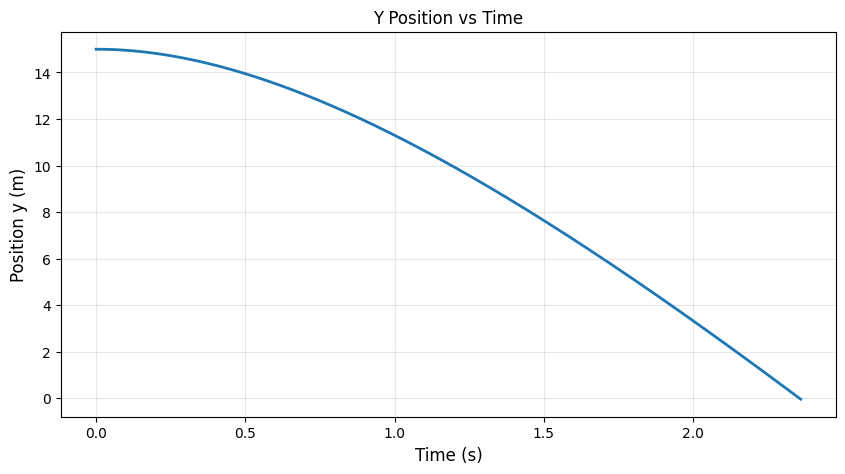

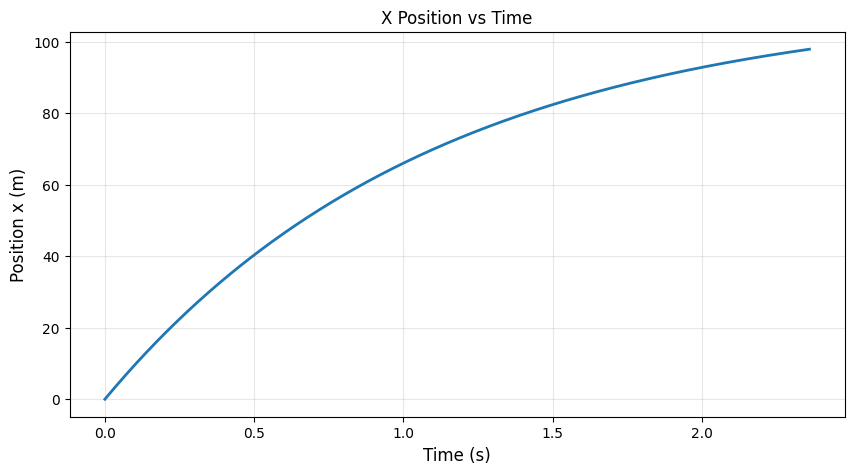

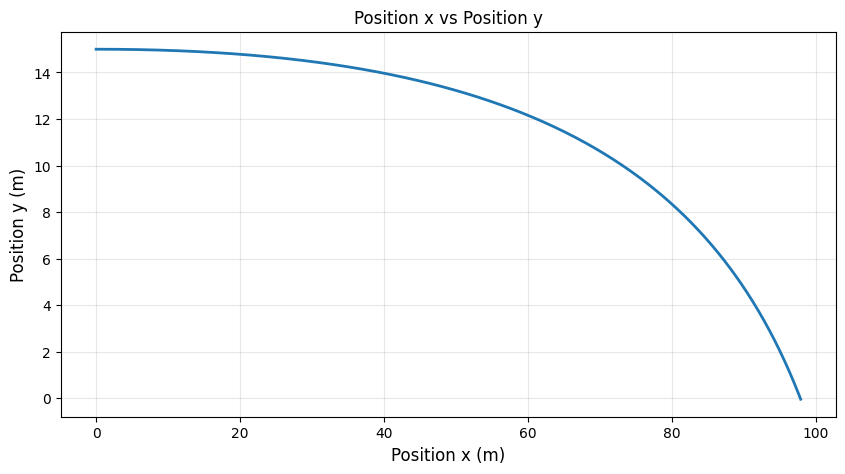

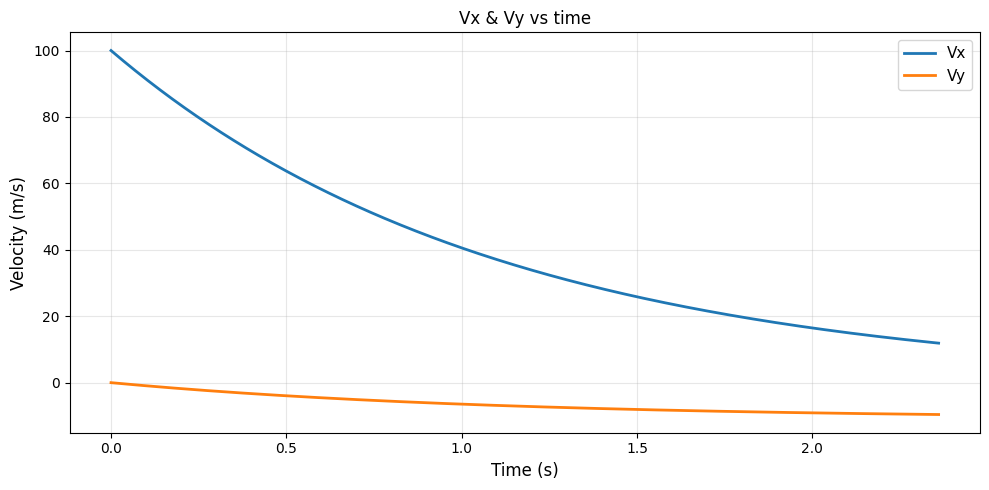

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import funcs

class bullet:
    def __init__(self,g):
        self.g = g
    
    def get_drag(self, v_mag):
        
        return v_mag * .9

def projectile(dt,y,b):
    """
    To be given to an ODE integrator to find the trajectory of a bullet.
    given y, returns dydt
    b is an object assumed to contain:
        b.g - graviational acceleration
        b.drag - a function that returns the drag force Fd, given the magnitude of velocity.
    """
    #Unpack y
    x0, y0, vx, vy = y
    
    #Get magnitude of velocity
    v_mag = np.sqrt(vx**2 + vy**2)
    
    #Get drag force
    F_drag = b.get_drag(v_mag)
    
    #calculate components of acceleration
    ax = -F_drag * (vx/v_mag)
    ay = -F_drag * (vy/v_mag) - b.g
    
    #if hit the ground, stop
    # if y0 <= 0:
        
    #     if vy != 0:
    #         ay = - vy/dt
    #     if vx != 0:
    #         ax = - vx/dt
            
    
    return np.array([vx, vy, ax, ay])
    
    
def solve_ode(f, tspan, y0, b, method=funcs.Euler, *args, **options):
    
    dt = options.get('first_step')
    numsteps = int((tspan[1] - tspan[0]) / dt)
    
    y = []
    y.append(y0)
    
    t = []
    t.append(tspan[0])
    
    
    for i in range(1,numsteps):
        y_prev = y[i-1]
        
        if y_prev[1] <= 0:
            break
        
        y.append(y_prev + dt * f(dt,y_prev,b))
        t.append(t[-1] + dt)
        
        
    return np.array(y), np.array(t)
        
        
        
        
bul = bullet(9.8)
y0 = np.array([0,15,100,0])

y,t = solve_ode(projectile,[0,3],y0,bul,first_step=0.005)


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, y[:,1], linewidth=2)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Position y (m)', fontsize=12)
plt.title('Y Position vs Time', fontsize=12)
plt.grid(True, alpha=0.3)

plt.figure(figsize=(10, 5))
plt.plot(t, y[:,0], linewidth=2)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Position x (m)', fontsize=12)
plt.title('X Position vs Time', fontsize=12)
plt.grid(True, alpha=0.3)

plt.figure(figsize=(10, 5))
plt.plot(y[:,0], y[:,1], linewidth=2)
plt.xlabel('Position x (m)', fontsize=12)
plt.ylabel('Position y (m)', fontsize=12)
plt.title('Position x vs Position y', fontsize=12)
plt.grid(True, alpha=0.3)

plt.figure(figsize=(10, 5))
plt.plot(t, y[:,2], linewidth=2, label="Vx")
plt.plot(t, y[:,3], linewidth=2, label="Vy")
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Velocity (m/s)', fontsize=12)
plt.title('Vx & Vy vs time', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()